## Importing necessary library

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('./data/train.csv')

## Sort overview of our data

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### we can see that only 38% of total passenger survived

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Since feature Passenger ID dont play any role in prediction we are dropping it

In [6]:
train = train.drop(columns=['PassengerId'],axis=1)

## Since feature Name  and Ticket is highly random and nither catogorical nor numerical  it would be silly idea to actually use this as feature in ML model so we are also dropping it

In [7]:
train = train.drop(columns=['Name','Ticket'],axis=1)

In [8]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Getting insight about none values in data to Impute it later

In [9]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Imputing missing values of Age feature according Sex of each passenger by mean 

In [10]:
train['Age'].fillna(train.groupby(["Sex"])["Age"].transform(np.mean), inplace=True)

In [11]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Imputing missing values of Cabin using "None"

In [12]:
train['Cabin'].fillna(value='None',inplace=True)

In [13]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [14]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## Imputing Emarked feature according to the most occuring values

In [15]:
train['Embarked'].fillna(value=train['Embarked'].mode()[0],inplace=True)

In [16]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [17]:
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
886,0,2,male,27.000000,0,0,13.00,None,S
887,1,1,female,19.000000,0,0,30.00,B42,S
888,0,3,female,27.915709,1,2,23.45,None,S
889,1,1,male,26.000000,0,0,30.00,C148,C
890,0,3,male,32.000000,0,0,7.75,None,Q


## Onehot Encoding of the Sex feature 

In [18]:
train['Sex_female'] = pd.get_dummies(train['Sex'],prefix='Sex',)['Sex_female']
train['Sex_male'] = pd.get_dummies(train['Sex'],prefix='Sex',)['Sex_male']

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,male,22.0,1,0,7.2500,None,S,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1,0
2,1,3,female,26.0,0,0,7.9250,None,S,1,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1,0
4,0,3,male,35.0,0,0,8.0500,None,S,0,1


## OneHot encoding of Embarked feature

In [20]:
for a in train.Embarked.unique():
    train[a+'_Embarked'] = pd.get_dummies(train['Embarked'],prefix='Embarked')['Embarked_'+a]

In [21]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_female,Sex_male,S_Embarked,C_Embarked,Q_Embarked
0,0,3,male,22.0,1,0,7.2500,None,S,0,1,1,0,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,None,S,1,0,1,0,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,None,S,0,1,1,0,0


## Removing Cabin feature 

In [22]:
train = train.drop(columns=['Cabin'],axis=1)

In [23]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,S_Embarked,C_Embarked,Q_Embarked
0,0,3,male,22.0,1,0,7.2500,S,0,1,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,1,0,0
3,1,1,female,35.0,1,0,53.1000,S,1,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,0,1,1,0,0


## Removing OneHot Encoded feature

In [24]:
train = train.drop(columns = ['Sex','Embarked'],axis=1)

## Splitting data into x_train and y_train for training the model

In [25]:
y_train = pd.DataFrame(train['Survived'])

In [26]:
x_train = train.drop(columns=['Survived'], axis=1)

## normalizing the X_train values for training 

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(x_train)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
scaler.mean_

array([ 2.30864198, 29.73603423,  0.52300786,  0.38159371, 32.20420797,
        0.35241302,  0.64758698,  0.72502806,  0.18855219,  0.08641975])

In [31]:
all_data = scaler.transform(x_train)

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [32]:
columns = []
for head in x_train.columns.values:
    columns.append(head)

In [33]:
all_data = pd.DataFrame(all_data,columns=columns)

## Inpecting the Normalized x_train values

In [34]:
all_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,S_Embarked,C_Embarked,Q_Embarked
0,0.827377,-0.594732,0.432793,-0.473674,-0.502445,-0.737695,0.737695,0.615838,-0.482043,-0.307562
1,-1.566107,0.635319,0.432793,-0.473674,0.786845,1.355574,-1.355574,-1.623803,2.074505,-0.307562
2,0.827377,-0.287220,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,0.615838,-0.482043,-0.307562
3,-1.566107,0.404684,0.432793,-0.473674,0.420730,1.355574,-1.355574,0.615838,-0.482043,-0.307562
4,0.827377,0.404684,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,0.615838,-0.482043,-0.307562


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [36]:
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Random Forest Classifier

In [37]:
clf = RandomForestClassifier(n_estimators=100,random_state=23)
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=23)
clf.fit(X_train, Y_train)

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [124]:
Y_predict = clf.predict(X_test)

In [39]:
clf.score(X_test,Y_test)

0.8169491525423729

In [40]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))

[[161  27]
 [ 27  80]]
0.8169491525423729


### Accuracy of Random forest

In [41]:
print(classification_report(Y_test,Y_predict,target_names=['Died','Survived']))

              precision    recall  f1-score   support

        Died       0.86      0.86      0.86       188
    Survived       0.75      0.75      0.75       107

   micro avg       0.82      0.82      0.82       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.82      0.82      0.82       295



## Classification report of Random Forest

## Tuning the Random Forest Classifier

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
rfc = RandomForestClassifier(n_estimators=100,random_state=23)
rfc_param ={
    'max_depth':[1,3,5,7,9],
    'max_features':[2,3,4],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[10,11,12],
    'n_estimators':[600,700,800]}
gsearch_rfc=GridSearchCV(estimator=rfc,param_grid=rfc_param,scoring='accuracy',n_jobs=4,verbose=1)
gsearch_rfc.fit(X_train,Y_train)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 1215 out of 1215 | elapsed:  6.6min finished
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [1, 3, 5, 7, 9], 'max_features': [2, 3, 4], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [10, 11, 12], 'n_estimators': [600, 700, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

## Best Estimator of Random Forest Classifer

In [44]:
gsearch_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [45]:
gsearch_rfc.best_score_

0.8070469798657718

### Accuracy of tuned paramter of Random Forest Classifier

In [46]:
print(gsearch_rfc)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [1, 3, 5, 7, 9], 'max_features': [2, 3, 4], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [10, 11, 12], 'n_estimators': [600, 700, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)


In [47]:
gsearch_rfc.best_params_

{'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 700}

### Tuned parameters for Random Forest Classifier

In [48]:
rfc.set_params(max_depth=7,max_features=3,min_samples_leaf=10,min_samples_split=2,n_estimators=700)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [49]:
rfc.fit(X_train,Y_train)

C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [50]:
Y_predict = rfc.predict(X_test)

In [51]:
rfc.score(X_test,Y_test)

0.8135593220338984

In [52]:
confusion_matrix(Y_test,Y_predict)

array([[174,  14],
       [ 41,  66]], dtype=int64)

In [53]:
print(classification_report(Y_test,Y_predict,target_names=['Died','Survived']))

              precision    recall  f1-score   support

        Died       0.81      0.93      0.86       188
    Survived       0.82      0.62      0.71       107

   micro avg       0.81      0.81      0.81       295
   macro avg       0.82      0.77      0.78       295
weighted avg       0.81      0.81      0.81       295



## KNeighbors Classifier 

In [54]:
from sklearn.neighbors import KNeighborsClassifier

## Iterating over many neighbors vales to get optimium Classifier

In [55]:
for k in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    Y_predict= neigh.predict(X_test)
    print('accuracy for k=',k,' ',accuracy_score(Y_test, Y_predict))

accuracy for k= 1   0.7288135593220338
accuracy for k= 2   0.7288135593220338
accuracy for k= 3   0.7661016949152543
accuracy for k= 4   0.7322033898305085
accuracy for k= 5   0.7389830508474576
accuracy for k= 6   0.7457627118644068
accuracy for k= 7   0.7559322033898305
accuracy for k= 8   0.7559322033898305
accuracy for k= 9   0.7593220338983051
accuracy for k= 10   0.7593220338983051
accuracy for k= 11   0.752542372881356
accuracy for k= 12   0.7694915254237288
accuracy for k= 13   0.752542372881356
accuracy for k= 14   0.7288135593220338
accuracy for k= 15   0.7423728813559322
accuracy for k= 16   0.7322033898305085
accuracy for k= 17   0.7288135593220338
accuracy for k= 18   0.7254237288135593
accuracy for k= 19   0.7220338983050848


C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataCo

## Using optimum value of Neighbour value to calculate best Prediction

In [74]:
knn = KNeighborsClassifier(n_neighbors=9,weights='distance',algorithm='ball_tree')`
knn.fit(X_train,Y_train)
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))
print(classification_report(Y_test,Y_predict))

[[153  35]
 [ 28  79]]
0.7864406779661017
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       188
           1       0.69      0.74      0.71       107

   micro avg       0.79      0.79      0.79       295
   macro avg       0.77      0.78      0.77       295
weighted avg       0.79      0.79      0.79       295



C:\Users\welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


## Support Vector Classifier

In [57]:
from sklearn.svm import SVC

In [60]:
svc_clf = SVC(gamma='scale',kernel='rbf',random_state=23)
svc_clf.fit(X_train, Y_train)
Y_predict= svc_clf.predict(X_test)
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))

[[166  22]
 [ 53  54]]
0.7457627118644068


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Accuracy of the SVC

## Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtc_clf = DecisionTreeClassifier(random_state=23,max_depth=9)
dtc_clf.fit(X_train,Y_train)
Y_predict = dtc_clf.predict(X_test)
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))

[[175  13]
 [ 34  73]]
0.8406779661016949


### Above if the  confusion matrix  and  Accuracy score of the Dicision tree classifier

## Gussain Naive Bayes classifier

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train,Y_train)
Y_predict = gnb_clf.predict(X_test)
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[153  35]
 [ 28  79]]
0.7864406779661017


### Above if the  confusion matrix  and  Accuracy score of the Gussain Naive Bayes Classifier

## Perceptron Analysis of Given Data

In [76]:
from sklearn.linear_model import Perceptron

In [94]:
pcp_clf = Perceptron(alpha=0.00001,penalty='l1',max_iter=2)
pcp_clf.fit(X_train,Y_train)
Y_predict = pcp_clf.predict(X_test)
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))

[[147  41]
 [ 23  84]]
0.7830508474576271


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Above if the  confusion matrix  and  Accuracy score of the Perceptron

## Multi Layer Perceptron Classfier

In [99]:
from sklearn.neural_network import MLPClassifier

In [103]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=29, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=23, learning_rate_init=.1)
mlp.fit(X_train, Y_train)
print("Training set score: %f" % mlp.score(X_train, Y_train))
print("Test set score: %f" % mlp.score(X_test, Y_test))
Y_predict = mlp.predict(X_test)
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))

Iteration 1, loss = 6.37787152
Iteration 2, loss = 0.67623669
Iteration 3, loss = 0.67203467
Iteration 4, loss = 0.67163152
Iteration 5, loss = 0.67230398
Iteration 6, loss = 0.67205512
Iteration 7, loss = 0.66600328
Iteration 8, loss = 0.65579875
Iteration 9, loss = 0.65405741
Iteration 10, loss = 0.64677318
Iteration 11, loss = 0.63174252
Iteration 12, loss = 0.62655095
Iteration 13, loss = 0.63015746
Iteration 14, loss = 0.62298863
Iteration 15, loss = 0.61888734
Iteration 16, loss = 0.63469115
Iteration 17, loss = 0.63837721
Iteration 18, loss = 0.61447284
Iteration 19, loss = 0.61055277
Iteration 20, loss = 0.61227650
Iteration 21, loss = 0.68075953
Iteration 22, loss = 0.62698449
Iteration 23, loss = 0.65042628
Iteration 24, loss = 0.62193348
Iteration 25, loss = 0.61059001
Iteration 26, loss = 0.60498936
Iteration 27, loss = 0.60663799
Iteration 28, loss = 0.60096728
Iteration 29, loss = 0.59704872
Training set score: 0.627517
Test set score: 0.630508
[[ 86 102]
 [  7 100]]
0.63

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (29) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Above if the  confusion matrix  and  Accuracy score of the Multi Layer Perceptron Classifier

### AdaBoost Classfier

In [105]:
from sklearn.ensemble import AdaBoostClassifier

In [118]:
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=11,criterion='gini'))
ABC.fit(X_train,Y_train)
Y_predict = ABC.predict(X_test)
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))

[[162  26]
 [ 22  85]]
0.8372881355932204


C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Above if the  confusion matrix  and  Accuracy score of the Ada Boosted of Decision Tree Classifier

## Gradient Boosting Classifier

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
GBC = GradientBoostingClassifier(learning_rate=0.03,min_samples_split=3,verbose=1)
GBC.fit(X_train,Y_train)
Y_predict = GBC.predict(X_test)
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss   Remaining Time 
         1           1.3122           18.80s
         2           1.2851            9.31s
         3           1.2596            6.46s
         4           1.2357            4.79s
         5           1.2132            3.79s
         6           1.1920            3.19s
         7           1.1720            2.71s
         8           1.1532            2.34s
         9           1.1353            2.10s
        10           1.1184            1.87s
        20           0.9913            0.88s
        30           0.9119            0.53s
        40           0.8601            0.36s
        50           0.8246            0.25s
        60           0.7992            0.17s
        70           0.7804            0.11s
        80           0.7604            0.07s
        90           0.7459            0.03s
       100           0.7356            0.00s
[[179   9]
 [ 40  67]]
0.8338983050847457


### Confusion matrix and Accuracy score of Gradient Boosting Classifier

## Visualizing the Accuracy of each models in Line plot to know which Model best fit the Given  Data

In [123]:
from matplotlib import pyplot as plt
import seaborn as sns1`

In [140]:
accuracy = []
models = []

In [141]:
accuracy.append(accuracy_score(Y_test,rfc.predict(X_test)))
models.append('Random Forest')
accuracy.append(accuracy_score(Y_test,knn.predict(X_test)))
models.append('KNN')
accuracy.append(accuracy_score(Y_test,svc_clf.predict(X_test)))
models.append('SVC')
accuracy.append(accuracy_score(Y_test,GBC.predict(X_test)))
models.append('GBC')
accuracy.append(accuracy_score(Y_test,ABC.predict(X_test)))
models.append('Ada Boost')
accuracy.append(accuracy_score(Y_test,gnb_clf.predict(X_test)))
models.append('Gussian Na')

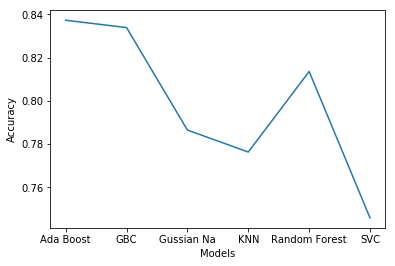

In [146]:
g = sns.lineplot(y=accuracy,x=models,)
g.set(xlabel='Models',ylabel='Accuracy')
plt.show()

##  We can see that AdaBoost model has good accuracy score than Models

## Future Enchancement Grid Search of best params of Each models and VIsualizing accuracy of tuned model vs untuned model

In [154]:
ABC_tune = AdaBoostClassifier()
ABC_tune_param ={
    'n_estimators':[30,50,60,70,80],
    'learning_rate':[1,0.9,0.8],
    'n_estimators':[600,700,800],
    'random_state':[10,23,30,45]}
GCV_ABC=GridSearchCV(estimator=ABC_tune,param_grid=ABC_tune_param,scoring='accuracy',n_jobs=4,verbose=1,)
GCV_ABC.fit(X_train,Y_train)

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed:   41.9s finished
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [600, 700, 800], 'learning_rate': [1, 0.9, 0.8], 'random_state': [10, 23, 30, 45]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [157]:
GCV_ABC.best_params_
# print(GCV_ABC.best_score_)

{'learning_rate': 0.8, 'n_estimators': 600, 'random_state': 10}

In [158]:
ABC_tuned = GCV_ABC.best_estimator_

In [159]:
ABC_tuned.fit(X_train,Y_train)
Y_predict = ABC_tuned.predict(X_test)
print(confusion_matrix(Y_test,Y_predict))
print(accuracy_score(Y_test,Y_predict))

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[160  28]
 [ 30  77]]
0.8033898305084746


## Summary

### 1. First we delete every columns which is not important in prediction
### 2. Then we  select the best features and split the data into X_train and Y_train for training purpose
### 3. Further splitting the data into test and train for testing and training purpose
### 4. Training the Models with data and logging the Accuracy score of each models
### 5. Visualizing each  Accuracy and models By plotting in Line plot